In [13]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

REPO = "boettiger-lab/rl4eco"
PATH_IN_REPO = "rl4fisheries-reproducing/"

SAVE_LOC = "figures/"
DATA_LOC = "data/" + PATH_IN_REPO

In [14]:
rewards = [ 
    pd.read_csv(DATA_LOC + f"UM{i}_rew.csv")
    for i in [1, 2, 3]
]
# ^each element: pd 0 | rew | agent | agent_ugly_name

for df in rewards:
    df.columns = ["ep", "utility", "policy", "policy_ugly_name"]
    # for nicer plot legend

UM1_rew = rewards[0][["ep", "utility", "policy"]]
UM2_rew = rewards[1][["ep", "utility", "policy"]]
UM3_rew = rewards[2][["ep", "utility", "policy"]]

for df in [UM1_rew, UM2_rew, UM3_rew]:
    df["policy type"] = df.apply(
        axis=1, 
        func = lambda row: "RL" if row.policy[-2:] == "RL" else "Fixed"
    )

In [15]:
np.unique(UM2_rew["policy type"])

array(['Fixed', 'RL'], dtype=object)

In [16]:

sns.set_theme(
    palette=sns.color_palette("colorblind"),
    font="Times New Roman",
    font_scale=2,
    style="whitegrid",
)
sns.axes_style(
    style = {"axes.linewidth":4}
)

{}

In [17]:
# sns.displot(
#     UM1_rew, x='utility', 
#     hue='policy', 
#     kind='kde', 
#     fill=True,
#     row='policy type'
# )

In [18]:
# sns.displot(
#     UM2_rew, x='utility', 
#     hue='policy', 
#     kind='kde', 
#     fill=True,
#     row='policy type'
# )

In [19]:
# sns.displot(
#     UM3_rew, x='utility', 
#     hue='policy', 
#     kind='kde', 
#     fill=True,
#     row='policy type'
# )

In [20]:
UM1_rew['utility function'] = "Harvested biomass"
UM2_rew['utility function'] = "HARA"
UM3_rew['utility function'] = "Trophy fishing"

In [21]:
rew_df = pd.concat([UM1_rew, UM2_rew, UM3_rew])

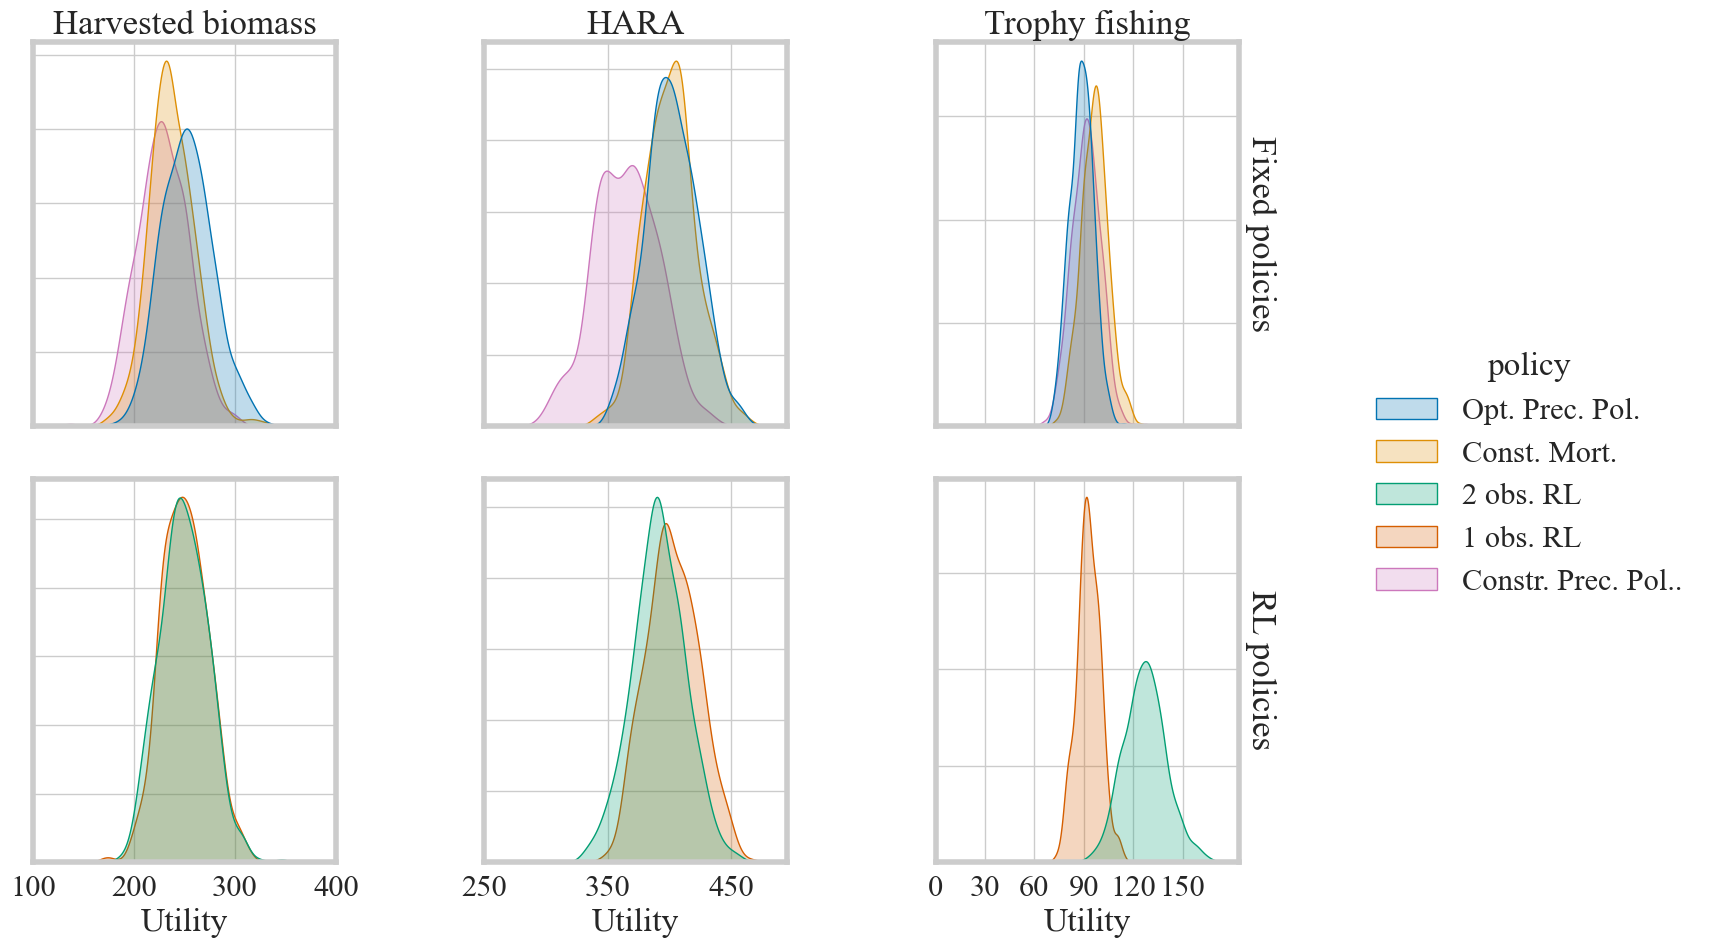

In [ ]:
mpl.rcParams['axes.linewidth'] = 4

rew_df = rew_df.reset_index(drop=True)

g = sns.displot(
    rew_df, x='utility', 
    hue='policy', 
    kind='kde', 
    fill=True,
    row='policy type',
    col='utility function',
    facet_kws = dict(margin_titles=True, sharey=False, sharex="col"),
)
g.set_titles(col_template="{col_name}", row_template="{row_name} policies", size=25)
g.set_axis_labels("Utility", "")
g.tight_layout()
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 
        ax.set(yticklabels=[])
        
        if (
                (ax.title.get_text() == "Trophy fishing")
                or (idx==5) # 6 axes in total, only top one has title text, so needed to catch lower right corner too here
        ):
            xticks = [0, 30, 60, 90, 120, 150]
            ax.set(xticks=xticks)
            ax.set(xticklabels=xticks) 
        elif (
            (ax.title.get_text() == "HARA")
            or (idx==4)
        ):
            xticks = [250, 350, 450]
            ax.set(xticks=xticks)
            ax.set(xticklabels=xticks)
        else:
            xticks = [100, 200, 300, 400]
            ax.set(xticks=xticks)
            ax.set(xticklabels=xticks)
g.savefig(SAVE_LOC+"rewards.jpeg")
g

In [23]:
rew_summary_df = rew_df[["utility", "policy", "utility function"]].groupby(["policy", "utility function"]).agg(["mean", "std"])
rew_summary_df.head()
# rew_summary_df.columns = ['Mean Utility', 'St. Dev. Utility']
# rew_summary_df.index = ["1 obs. RL", "2 obs. RL", "FMSY", "cPP", "oPP"]
# rew_summary_df = rew_summary_df.reindex(["1 obs. RL", "2 obs. RL", "FMSY", "oPP", "cPP"])
# rew_summary_df.to_csv("csv/rew-table.csv")

utility           
                                   mean        std
policy    utility function                        
1 obs. RL HARA               402.432589  21.161738
          Harvested biomass  250.250512  22.847059
          Trophy fishing      92.731574   7.140343
2 obs. RL HARA               391.265554  21.535105
          Harvested biomass  249.465633  23.887387

In [24]:
# rew_summary_df.reset_index().pivot(columns='utility function', values)

In [25]:
df = rew_summary_df.reset_index()
df.columns = ['Policy', 'utility function', 'utility mean', 'utility st. dev.']
df['Utility Mean +/- St. Dev.'] = df.apply(
    axis=1, 
    func= lambda row: f"{row['utility mean']:.1f} +/- {row['utility st. dev.']:.1f}"
)
df = df.pivot(index='Policy', columns=['utility function'], values='Utility Mean +/- St. Dev.')
df= df[['Harvested biomass', 'HARA', 'Trophy fishing']]
df

utility function,Harvested biomass,HARA,Trophy fishing
Policy,,,
1 obs. RL,250.3 +/- 22.8,402.4 +/- 21.2,92.7 +/- 7.1
2 obs. RL,249.5 +/- 23.9,391.3 +/- 21.5,126.9 +/- 12.8
Const. Mort.,237.3 +/- 22.7,400.6 +/- 20.7,96.4 +/- 8.3
Constr. Prec. Pol..,228.6 +/- 25.1,364.6 +/- 26.0,91.3 +/- 8.8
Opt. Prec. Pol.,252.8 +/- 25.3,401.7 +/- 20.9,88.5 +/- 7.2


In [26]:
df.to_csv("csv/rew-table.csv")

In [27]:
UM1_rew[UM1_rew.policy=="Const. Mort."]['utility'].mean()

np.float64(237.2834570839961)